In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('iphone.csv')

In [3]:
df.head()

,Gender,Age,Salary,Purchase
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df['Gender'] = df['Gender'].replace('Male',0)

In [6]:
df['Gender'] = df['Gender'].replace('Female',1)

In [7]:
df.head()

,Gender,Age,Salary,Purchase
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [28]:
X = df[['Gender','Age','Salary']]
y = df['Purchase']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
s = StandardScaler()

In [32]:
s.fit(X_train)

StandardScaler()

In [33]:
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
err_rate = []

In [38]:
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi = knn.predict(X_test)
    err_rate.append(np.mean(predi != y_test))

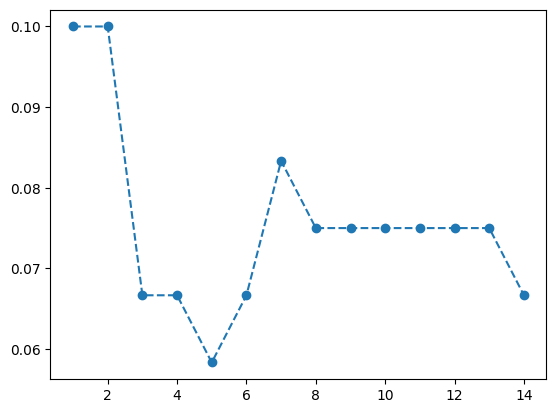

In [40]:
plt.figure()
plt.plot(range(1,15),err_rate,linestyle= 'dashed',marker = 'o')

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
pred = knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,pred))

[[74  6]
 [ 1 39]]


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.95        80
           1       0.87      0.97      0.92        40

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120

